In [7]:
import numpy as np
import sys
import os
import random
import matplotlib.pyplot as plt
import math
sys.path.append('../')
os.getcwd()


from src.GridWorld import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


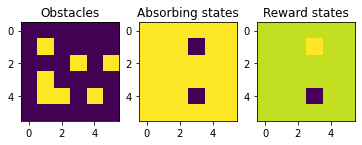

In [9]:
grid = GridWorld()

In [5]:
policy = policy_setup(grid) 
Q = Q_setup(grid) -  Q_setup(grid)
discount = 0.8
averages_per_state = Q_setup(grid)
print(policy)
print(Q)
print(count_per_state)

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


NameError: name 'count_per_state' is not defined

In [6]:
grid.get_trace(policy, exploring_start = True)

[(13, 3, -1.0),
 (16, 1, -1.0),
 (16, 3, -1.0),
 (17, 1, -1.0),
 (18, 1, -1.0),
 (19, 3, -1.0),
 (18, 2, -1.0),
 (18, 1, -1.0),
 (19, 1, -1.0),
 (19, 3, -1.0),
 (22, 3, -1.0),
 (22, 2, -1.0),
 (22, 0, -1.0),
 (19, 2, -1.0),
 (22, 0, -1.0),
 (19, 3, -1.0),
 (18, 0, -1.0),
 (14, 2, -1.0),
 (18, 3, -1.0),
 (17, 0, -100.0)]

In [72]:
self = grid

In [73]:
def create_lists(self,trace,lists):
    
    for episode in trace:
        
        state_id,action,reward = episode
        
        if (state_id,action) not in lists:
            lists[(state_id,action)] = []
            
        for state_action_pair in lists:
            lists[state_action_pair].append(reward)
    
    return lists

lists = {}
trace =  [(5, 1, -1.0),(10, 3, -1.0),(9, 0, -1.0),(4, 1, -1.0),(3, 0, -1.0),(3, 0, 10.0)]
create_lists(self,trace,lists)

{(5, 1): [-1.0, -1.0, -1.0, -1.0, -1.0, 10.0],
 (10, 3): [-1.0, -1.0, -1.0, -1.0, 10.0],
 (9, 0): [-1.0, -1.0, -1.0, 10.0],
 (4, 1): [-1.0, -1.0, 10.0],
 (3, 0): [-1.0, 10.0]}

In [74]:
def discount_rewards(self,lists,discount):
    
    for state_action in lists:
        dis_reward = 0 
        for time,reward in enumerate(lists[state_action]):
            dis_reward += (discount ** time) * reward
        lists[state_action] = dis_reward
    
    return lists

In [75]:
discount_rewards(self,lists,0.8)

{(5, 1): -0.08479999999999999,
 (10, 3): 1.1440000000000006,
 (9, 0): 2.6800000000000006,
 (4, 1): 4.600000000000001,
 (3, 0): 7.0}

In [76]:
lists

{(5, 1): -0.08479999999999999,
 (10, 3): 1.1440000000000006,
 (9, 0): 2.6800000000000006,
 (4, 1): 4.600000000000001,
 (3, 0): 7.0}

In [103]:
def mc_estimation(self,Q,policy,discount,averages_per_state,alpha):
    
    nr_of_traces = 5000
    
    for i in range(nr_of_traces):
        
        trace = self.get_trace(policy,True)
        
        #Gets discounted rewards per state_action pair 
        lists = {}
        lists = create_lists(self,trace,lists)
        lists = discount_rewards(self,lists,discount)
        
        for state,action in lists:
            #Q[state,action] += 1 / averages_per_state[state,action] * (lists[(state,action)] - Q[state, action])
            Q[state,action] += alpha * (lists[(state,action)] - Q[state, action])
            
            averages_per_state[state,action] += 1
            
    return Q

In [108]:
Q = mc_estimation(self,Q,policy,discount,averages_per_state,0.4)
Q

array([[ -3.8596231 ,  -4.01416006,  -4.51036481,  -4.77714758],
       [ -2.65500716,  -1.73484168,  -0.19511898,  -3.88002612],
       [  0.76984341,   5.53950033,  -1.10485063,  -1.06025737],
       [  4.65164767,   1.96899027,   9.97744326,  -2.3856772 ],
       [ -2.75498719,  -0.81261428,  -2.62405407,   0.15847811],
       [ -4.06546742,  -4.71318144,  -3.06983545,  -2.67132187],
       [ -4.87911062,  -4.83067689,  -4.91370656,  -3.43361512],
       [ -2.5241224 ,   7.93429374,   2.5023661 ,  -1.5595707 ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [ -2.69449009,  -3.62358432,   0.51555931,   6.01156432],
       [ -2.26394713,  -1.76453146,  -1.27259976,  -2.95918378],
       [ -4.90254038,  -4.79926653,  -4.90104852,  -4.8203777 ],
       [ -4.63676653,  -4.71542868,  -4.60684537,  -4.85146882],
       [ -3.15016661,  -4.87807127,  -4.64651084,  -4.99010644],
       [ -3.31575272, -29.07898629,  -4.92633758,  -3.98817354],
       [ -5.06027029,  -5

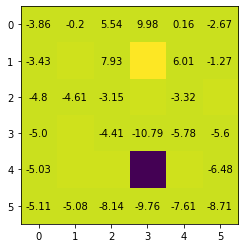

In [109]:
val = np.max(Q,axis = 1)
grid.draw_value(val)

In [110]:
opt_pol = grid.choose_policy(Q)
opt_pol

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

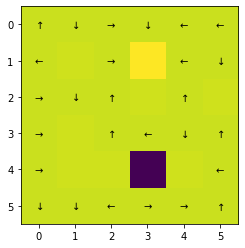

In [111]:
grid.draw_deterministic_policy(np.array([np.argmax(opt_pol[row,:]) for row in range(grid.state_size)]))


In [10]:
#Test Sarsa

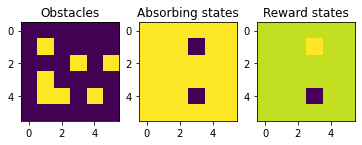

In [163]:
grid = GridWorld()

In [164]:
Q,opt_pol,episodes = grid.SARSA_Control(0.65,alpha = 0.2,epsilon = 0.01,episodes = 200)

-1.4122670201548893
-100.20303617324672
-1.054912927051292
-0.6952197783677495
-0.25796285142675973
-0.2063702811414078
-0.4633091961805661
-0.07243438567701305
-0.8623982676621569
-0.18368082627661897
-0.14694466102129522
-0.11755572881703613
-0.09404458305362895
-0.07523566644290314
-0.01230430563808771
-0.057727672026704924
-0.04618213762136392
-0.03694571009709113
0.01832765943856185
0.014662127550849502
-0.0361545254755552
0.01896060713579062
0.015168485708632495
-0.8026120146428662
-0.642089611714293
-1.0338587318919052
-0.9614886206594722
-0.11460221886115884
-0.7689773137305447
-0.29773689262096953
-0.6192012520995471
-0.4317942220403324
-0.8861622618930278
0.26246353231811104
-0.6655478951691053
-0.5324383161352843
-0.6847678158322149
-0.2889970897417844
-0.23119767179342743
-0.184958137434742
-0.1479665099477936
0.7571455130653592
-0.26980231057130677
-0.21584184845704546
0.7028452422579577
-0.3132425272172279
10.054986279202852
-2.633962312319214
-1.6152772444262729
-1.52721

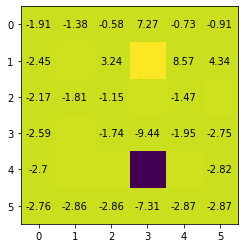

In [162]:
val = np.max(Q,axis = 1)
grid.draw_value(val)

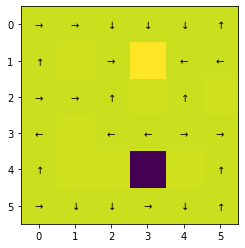

In [159]:
grid.draw_deterministic_policy(np.array([np.argmax(opt_pol[row,:]) for row in range(grid.state_size)]))


In [80]:
grid.neighbours

array([[ 0.,  1.,  6.,  0.],
       [ 1.,  2.,  1.,  0.],
       [ 2.,  3.,  7.,  1.],
       [ 3.,  4.,  8.,  2.],
       [ 4.,  5.,  9.,  3.],
       [ 5.,  5., 10.,  4.],
       [ 0.,  6., 11.,  6.],
       [ 2.,  8., 13.,  7.],
       [ 3.,  9.,  8.,  7.],
       [ 4., 10., 14.,  8.],
       [ 5., 10., 10.,  9.],
       [ 6., 12., 15., 11.],
       [12., 13., 12., 11.],
       [ 7., 13., 16., 12.],
       [ 9., 14., 18., 14.],
       [11., 15., 20., 15.],
       [13., 17., 16., 16.],
       [17., 18., 21., 16.],
       [14., 19., 18., 17.],
       [19., 19., 22., 18.],
       [15., 20., 23., 20.],
       [17., 21., 26., 21.],
       [19., 22., 28., 22.],
       [20., 24., 23., 23.],
       [24., 25., 24., 23.],
       [25., 26., 25., 24.],
       [21., 27., 26., 25.],
       [27., 28., 27., 26.],
       [22., 28., 28., 27.]])